In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from itertools import product
from typing import Union
from tqdm.notebook import tqdm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error as MAPE
get_ipython().run_line_magic('matplotlib', 'inline')

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore', ConvergenceWarning)

sns.set_style('white')

In [2]:
test_data = pd.read_csv("C:/Users/anita/OneDrive/Desktop/IPBA/Energy_Demand/energy_demand.csv")

In [3]:
test_data.head()

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N


In [5]:
test_data

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101,2020-10-02,99585.835,-6.076028,41988.240,26.980251,57597.595,-30.173823,0.625000,12.8,26.0,22.0,0.0,N,N
2102,2020-10-03,92277.025,-1.983471,44133.510,32.438156,48143.515,-33.538025,0.583333,17.4,29.4,19.8,0.0,N,N
2103,2020-10-04,94081.565,25.008614,88580.995,26.571687,5500.570,-0.163066,0.062500,13.5,29.5,8.4,0.0,N,N
2104,2020-10-05,113610.030,36.764701,106587.375,39.616015,7022.655,-6.511550,0.083333,9.1,12.7,7.3,12.8,N,N


In [6]:
test_data.tail()

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
2101,2020-10-02,99585.835,-6.076028,41988.240,26.980251,57597.595,-30.173823,0.625000,12.8,26.0,22.0,0.0,N,N
2102,2020-10-03,92277.025,-1.983471,44133.510,32.438156,48143.515,-33.538025,0.583333,17.4,29.4,19.8,0.0,N,N
2103,2020-10-04,94081.565,25.008614,88580.995,26.571687,5500.570,-0.163066,0.062500,13.5,29.5,8.4,0.0,N,N
2104,2020-10-05,113610.030,36.764701,106587.375,39.616015,7022.655,-6.511550,0.083333,9.1,12.7,7.3,12.8,N,N
2105,2020-10-06,122607.560,75.771059,122607.560,75.771059,0.000,0.000000,0.000000,8.9,12.6,5.8,1.0,N,N


In [7]:
test_data.shape # For array dimensions

(2106, 14)

In [8]:
test_data.describe #describe data types and get no. of counts

<bound method NDFrame.describe of             date      demand        RRP  demand_pos_RRP  RRP_positive  \
0     2015-01-01   99635.030  25.633696       97319.240     26.415953   
1     2015-01-02  129606.010  33.138988      121082.015     38.837661   
2     2015-01-03  142300.540  34.564855      142300.540     34.564855   
3     2015-01-04  104330.715  25.005560      104330.715     25.005560   
4     2015-01-05  118132.200  26.724176      118132.200     26.724176   
...          ...         ...        ...             ...           ...   
2101  2020-10-02   99585.835  -6.076028       41988.240     26.980251   
2102  2020-10-03   92277.025  -1.983471       44133.510     32.438156   
2103  2020-10-04   94081.565  25.008614       88580.995     26.571687   
2104  2020-10-05  113610.030  36.764701      106587.375     39.616015   
2105  2020-10-06  122607.560  75.771059      122607.560     75.771059   

      demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  \
0           2315.

In [9]:
test_data.columns #all the columns

Index(['date', 'demand', 'RRP', 'demand_pos_RRP', 'RRP_positive',
       'demand_neg_RRP', 'RRP_negative', 'frac_at_neg_RRP', 'min_temperature',
       'max_temperature', 'solar_exposure', 'rainfall', 'school_day',
       'holiday'],
      dtype='object')

In [10]:
test_data.nunique() #Count number of distinct elements

date               2106
demand             2106
RRP                2106
demand_pos_RRP     2106
RRP_positive       2106
demand_neg_RRP      192
RRP_negative        179
frac_at_neg_RRP      21
min_temperature     211
max_temperature     283
solar_exposure      316
rainfall            105
school_day            2
holiday               2
dtype: int64

Start Cleaning the Data

In [11]:
test_data.isnull().sum() #Checking for NULL values

date               0
demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     1
rainfall           3
school_day         0
holiday            0
dtype: int64

In [12]:
test_data = test_data.dropna() #Removing missing values

In [13]:
test_data.isnull().sum()

date               0
demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     0
rainfall           0
school_day         0
holiday            0
dtype: int64

In [14]:
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from itertools import product
from typing import Union
from tqdm.notebook import tqdm
from statsmodels.tsa.statespace.sarimax import SARIMAX

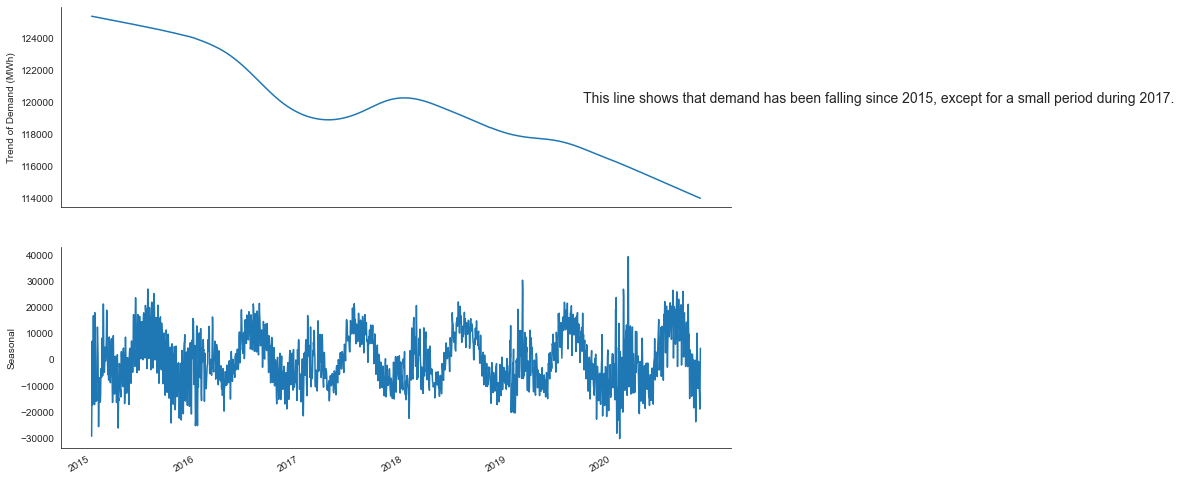

In [17]:
from sklearn.metrics import mean_absolute_percentage_error as MAPE
get_ipython().run_line_magic('matplotlib', 'inline')
from statsmodels.tsa.seasonal import STL
decomposition = STL(test_data['demand'], period=365).fit()
decomposition
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1,figsize=(12,9), sharex=True)
ax1.plot(decomposition.trend)
ax1.set_ylabel('Trend of Demand (MWh)')
ax1.text(1700, 120000, s="""This line shows that demand has been falling since 2015, except for a small period during 2017.""",
         fontsize=14)

ax2.plot(decomposition.seasonal)
ax2.set_ylabel('Seasonal')

plt.xticks(np.arange(0, 2100, 360), np.arange(2015, 2021, 1))
fig.autofmt_xdate()
sns.despine()
plt.show()

In [18]:
# minimum and maximum temperature x price
data = test_data[['date', 'RRP', 'max_temperature', 'min_temperature']]
data['avg_temperature'] = (data['max_temperature'] + data['min_temperature'])/2
data


,date,RRP,max_temperature,min_temperature,avg_temperature
0,2015-01-01,25.633696,26.9,13.3,20.10
1,2015-01-02,33.138988,38.8,15.4,27.10
2,2015-01-03,34.564855,38.2,20.0,29.10
3,2015-01-04,25.005560,21.4,16.3,18.85
4,2015-01-05,26.724176,22.0,15.0,18.50
...,...,...,...,...,...
2101,2020-10-02,-6.076028,26.0,12.8,19.40
2102,2020-10-03,-1.983471,29.4,17.4,23.40
2103,2020-10-04,25.008614,29.5,13.5,21.50
2104,2020-10-05,36.764701,12.7,9.1,10.90


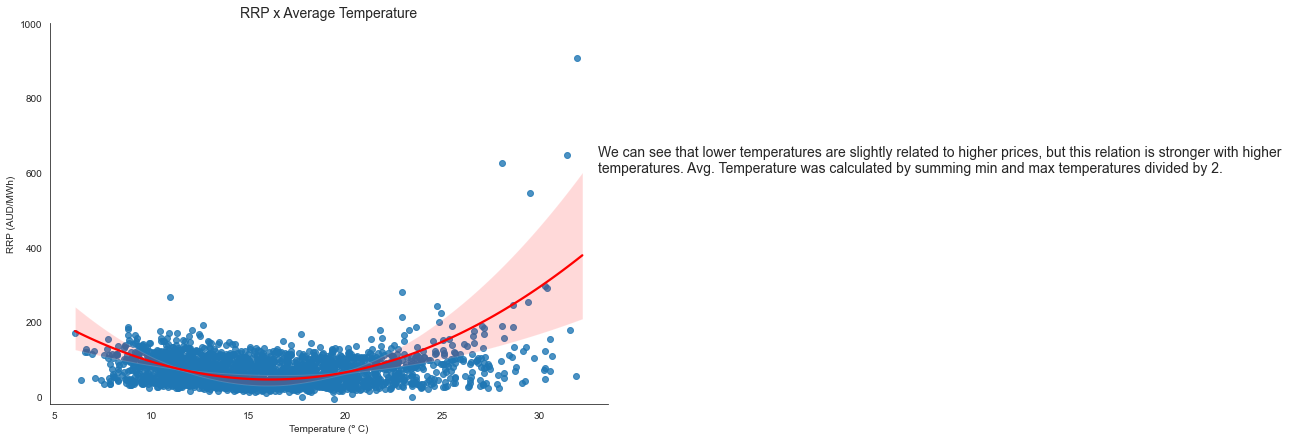

In [19]:
# RRP is recommended retail price in AUD$ / MWh
fig, ax = plt.subplots(figsize=(10,7))
sns.regplot(data=data, x='avg_temperature', y='RRP', order=2, ax=ax,line_kws={'color': 'red'})

ax.set_xlabel('Temperature (º C)')
ax.set_ylabel('RRP (AUD/MWh)')

ax.text(33, 600,"""We can see that lower temperatures are slightly related to higher prices, but this relation is stronger with higher 
temperatures. Avg. Temperature was calculated by summing min and max temperatures divided by 2.""", fontsize=14)

plt.title('RRP x Average Temperature', fontsize=14)
plt.ylim(-20, 1000)
sns.despine()
plt.show()

In [20]:
# Prices behave differently on different day types (holidays, schooldays, weekends)

#electricity consumption on different day types
# RRP is recommended retail price in AUD$ / MWh
data = test_data[['RRP', 'school_day', 'holiday']]
data

,RRP,school_day,holiday
0,25.633696,N,Y
1,33.138988,N,N
2,34.564855,N,N
3,25.005560,N,N
4,26.724176,N,N
...,...,...,...
2101,-6.076028,N,N
2102,-1.983471,N,N
2103,25.008614,N,N
2104,36.764701,N,N


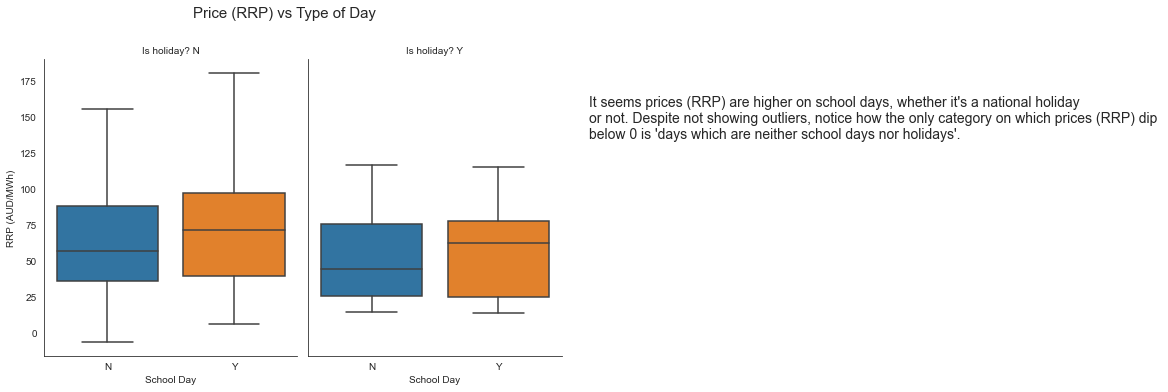

In [24]:
g = sns.catplot(data=data, x='school_day', y='RRP', kind='box',
                showfliers=False, col='holiday', col_order=['N', 'Y'],
               aspect=12/15)
g.set_axis_labels('School Day', 'RRP (AUD/MWh)')
g.set_titles('Is holiday? {col_name}')

g.axes.flat[0].text(3.8, 135,"""It seems prices (RRP) are higher on school days, whether it's a national holiday
or not. Despite not showing outliers, notice how the only category on which prices (RRP) dip 
below 0 is 'days which are neither school days nor holidays'.""", fontsize=14)

plt.suptitle("Price (RRP) vs Type of Day", fontsize=15, y=1.08)
plt.show()

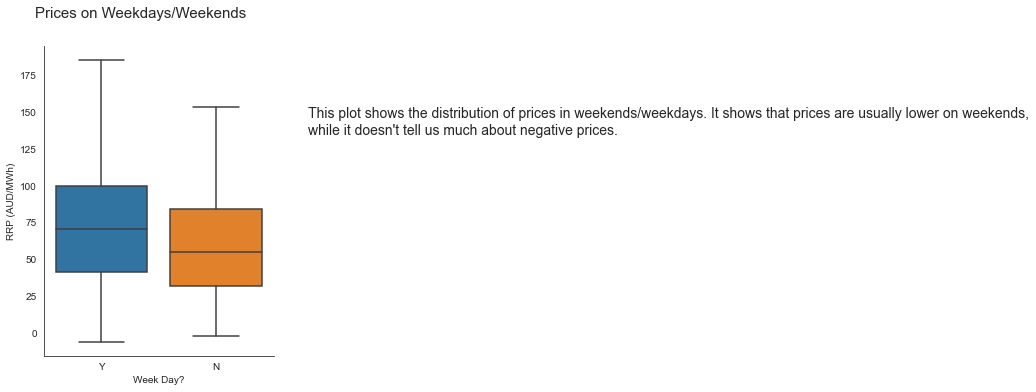

In [25]:
#electricity consumption on different day types
test_data['date'] = pd.to_datetime(test_data['date'], errors='coerce')# to convert date column in DATE format
data = test_data[['RRP', 'school_day', 'date']]
data['weekday'] = ['Y' if x <= 4 else 'N' for x in test_data['date'].dt.weekday]
g = sns.catplot(data=data, x='weekday', y='RRP', kind='box',showfliers=False, aspect=12/15)

g.set_axis_labels('Week Day?', 'RRP (AUD/MWh)')

g.axes.flat[0].text(1.8, 135,"""This plot shows the distribution of prices in weekends/weekdays. It shows that prices are usually lower on weekends,
while it doesn't tell us much about negative prices.""", fontsize=14)

plt.suptitle("Prices on Weekdays/Weekends", fontsize=15, y=1.08)
plt.show()

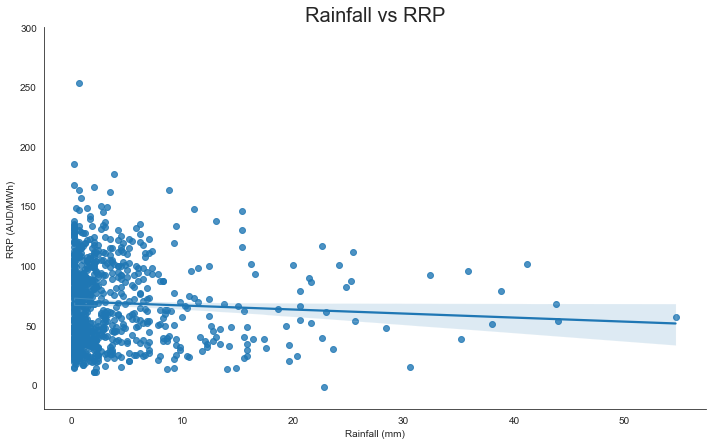

In [26]:
# Rainfall doesn't seem to strongly influence our prices

# minimum and maximum temperature x price
# RRP is recommended retail price in AUD$ / MWh

data = test_data[['RRP', 'rainfall']]

g = sns.lmplot(data=data[data['rainfall'] > 0], x='rainfall', y='RRP',palette="muted",
                height=6, aspect=10/6, order=1)

g.set_axis_labels('Rainfall (mm)', 'RRP (AUD/MWh)')
g.set(ylim=(-20, 300))

plt.title('Rainfall vs RRP', fontsize=20)
plt.show()

In [27]:
# However, solar exposure seems to be related:
# minimum and maximum temperature x price

data = test_data[['RRP', 'solar_exposure']]
data

,RRP,solar_exposure
0,25.633696,23.6
1,33.138988,26.8
2,34.564855,26.5
3,25.005560,25.2
4,26.724176,30.7
...,...,...
2101,-6.076028,22.0
2102,-1.983471,19.8
2103,25.008614,8.4
2104,36.764701,7.3


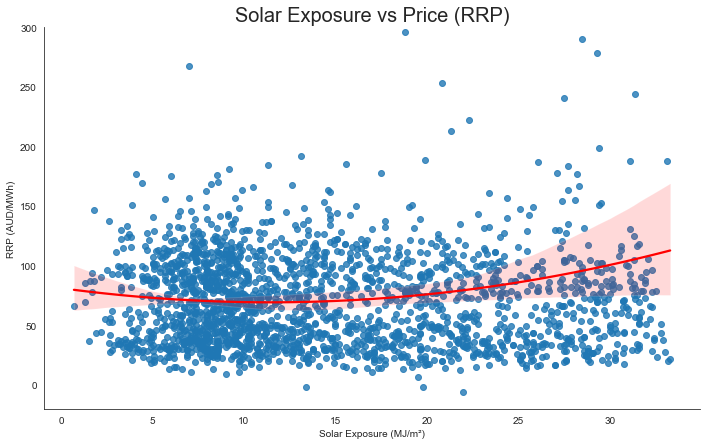

In [28]:
g = sns.lmplot(data=data, x='solar_exposure', y='RRP',
                height=6, aspect=10/6, order=2, line_kws={'color': 'red'})

g.set_axis_labels('Solar Exposure (MJ/m²)', 'RRP (AUD/MWh)')
g.set(ylim=(-20, 300))

plt.title('Solar Exposure vs Price (RRP)', fontsize=20)
plt.show()

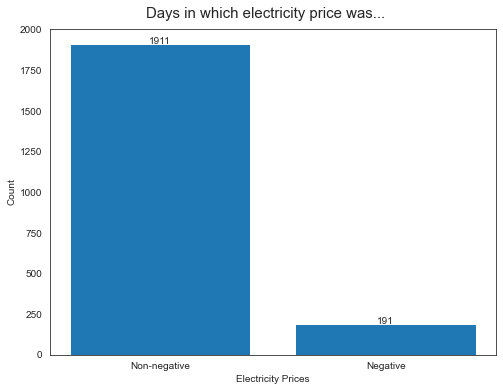

In [29]:
# There are only 191 days in which electricity traded for negative prices
filt = test_data['frac_at_neg_RRP'] > 0

fig, ax = plt.subplots(figsize=(8,6))

x = ['Non-negative', 'Negative']
y = [test_data[~filt].shape[0], test_data[filt].shape[0]]
ax.bar(x=x,height=y)

ax.set_xlabel("Electricity Prices")
ax.set_ylabel("Count")

for i, value in enumerate(y):
    plt.text(x=i, y=value+1, s=str(value), ha='center')

plt.suptitle("Days in which electricity price was...", y=0.93, fontsize=15)
plt.show()

In [30]:
# # Most days only traded negatively for less than 6 hours. However...
# 
# We see that most days with negative prices are only so for less than 6 hours
#(roughly 93.71%). Nevertheless, it's a substantial fraction of the day that can
#lead to bad results if not anticipated. Now that we know for how long during the
#day electricity trades for negatively, it's time to understand why it does so.
#Is there a pattern for these occurrences? One thing to notice is how there was 
#a surge in these points from mid-2019 onwards, perhaps indicating a public move
#towards renewable energy (solar panels at home, more so as pandemic restrictions 
#were enforced and led to homeworking).

In [31]:
# negative prices throughout data

def map_fraction_of_day(frac_neg):
    frac_dict = {1/24: '<= 1h',
                1/4: '>1h and <= 6h',
                1/2: '>6h and <= 12h',
                1: '>12h'}
    
    for key in frac_dict.keys():
        if frac_neg <= key:
            return frac_dict[key]

data = test_data[filt]
data['neg_duration'] = data['frac_at_neg_RRP'].apply(lambda x: map_fraction_of_day(x))

col_pal = sns.color_palette("colorblind", 4)
temp = col_pal[1]
col_pal[1] = col_pal[2]
col_pal[2] = temp
col_pal

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.8352941176470589, 0.3686274509803922, 0.0)]

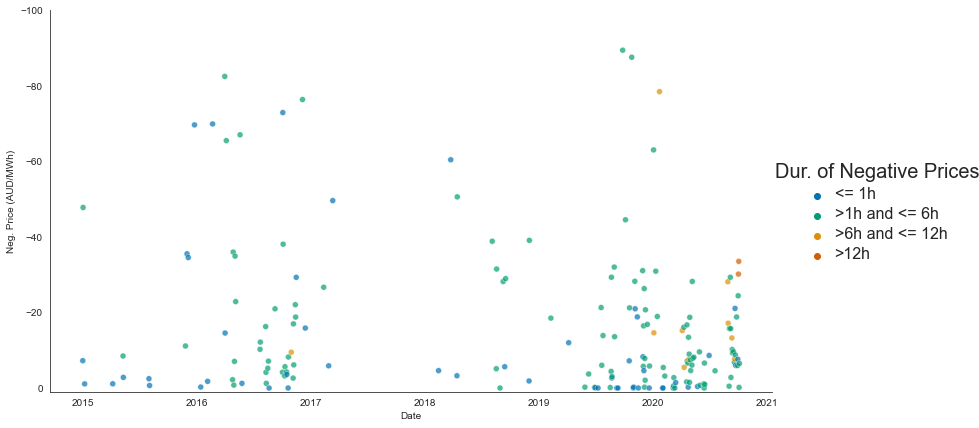

In [32]:
g = sns.relplot(data=data, x='date', y='RRP_negative', hue='neg_duration', kind='scatter',
            height=6, aspect=11/6, palette=col_pal,
           s=35, alpha=0.7)

g.set_axis_labels('Date', 'Neg. Price (AUD/MWh)')
g.legend.set_bbox_to_anchor([1.1, 0.5])
g._legend.set_title("Dur. of Negative Prices")
plt.ylim(1, -100)
plt.setp(g._legend.get_texts(), fontsize=16)
plt.setp(g._legend.get_title(), fontsize=20)

fig.autofmt_xdate()
plt.show()

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose
!pip install pmdarima  
# Import the library
from pmdarima import auto_arima
  
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
  Attempting uninstall: packaging
    Found existing installation: packaging 21.0
    Uninstalling packaging-21.0:
      Successfully uninstalled packaging-21.0
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.22.4 which is incompatible.


ImportError: cannot import name 'Literal' from 'statsmodels.compat.python' (C:\Users\anita\anaconda3\lib\site-packages\statsmodels\compat\python.py)